### Required Codio Assignment 3.3: Indexing

**Expected Time**: 60 Minutes

**Total Points**: 10

This activity works through a similar example to the video, again using the gapminder dataset.  The goal is to compute what fraction of the worlds GDP did each country generate each year. 

#### Index:

- [Problem 1](#Problem-1:-Total-GDP-by-year)
- [Problem 2](#Problem-2:-Resetting-the-Index)
- [Problem 3](#Problem-3:-Computing-Share-of-GDP)
- [Problem 4](#Problem-4:-Resetting-the-Index-Again)
- [Problem 5](#Problem-5:-Plotting-the-results)

In [1]:
import plotly.express as px
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
gapminder = px.data.gapminder()

In [3]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [4]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


[Back to top](#Index:) 


### Problem 1: Total GDP per Capita by year

**2 Points**

Use the `groupby` operation to group on the year column and compute the total GDP per Capita (`gdpPercap`) for each year (`sum`). Assign your results as a DataFrame to ans1 below.

In [5]:
### GRADED

ans1 = None

# YOUR CODE HERE
ans1 = gapminder.groupby('year').sum()[['gdpPercap']]

# Answer check
print(ans1)
print(type(ans1))

         gdpPercap
year              
1952  5.289892e+05
1957  6.105160e+05
1962  6.710654e+05
1967  7.786787e+05
1972  9.613518e+05
1977  1.038470e+06
1982  1.067684e+06
1987  1.121931e+06
1992  1.158522e+06
1997  1.290805e+06
2002  1.408334e+06
2007  1.658570e+06
<class 'pandas.core.frame.DataFrame'>


[Back to top](#Index:) 


### Problem 2: Resetting the Index

**2 Points**

In order to compute the share of GDP, set the index of the original gapminder dataframe to a multi-index DataFrame with `set_index` using the `year` and `country` columns. Assign the resulting DataFrame to `ans2` below.

In [6]:
### GRADED

ans2 = None

# YOUR CODE HERE
ans2 = gapminder.set_index(['year', 'country'])
# Answer check
print(ans2.head())
print(type(ans2))

                 continent  lifeExp       pop   gdpPercap iso_alpha  iso_num
year country                                                                
1952 Afghanistan      Asia   28.801   8425333  779.445314       AFG        4
1957 Afghanistan      Asia   30.332   9240934  820.853030       AFG        4
1962 Afghanistan      Asia   31.997  10267083  853.100710       AFG        4
1967 Afghanistan      Asia   34.020  11537966  836.197138       AFG        4
1972 Afghanistan      Asia   36.088  13079460  739.981106       AFG        4
<class 'pandas.core.frame.DataFrame'>


[Back to top](#Index:) 


### Problem 3: Computing Share of GDP

**2 Points**

Use your solutions from problem 1 and 2 to determine each country's share of the world GDP by year. Assign the resulting DataFrame to `ans3` below. 

Hint: The resulting DataFrame ans3 should have the following structure:

Columns:

- year: The year of the data.
- country: The name of the country.
- gdpPercap: The share of the world GDP for the corresponding country and year.

In [7]:
### GRADED

ans3 = None

# YOUR CODE HERE
a = gapminder.groupby('year').sum()[['gdpPercap']]
b = gapminder.set_index(['year','country'])
ans3 = b ['gdpPercap'].div(a['gdpPercap'], level='year').reset_index(name='gdpPercap')

# Answer check
print(ans3.head())
print(ans3.shape, gapminder.shape)

   year      country  gdpPercap
0  1952  Afghanistan   0.001473
1  1957  Afghanistan   0.001345
2  1962  Afghanistan   0.001271
3  1967  Afghanistan   0.001074
4  1972  Afghanistan   0.000770
(1704, 3) (1704, 8)


[Back to top](#Index:) 


### Problem 4: Resetting the Index Again

**2 Points**

Having computed the share of GDP by year in the earlier question using a multi-index, select the `gdpPercap` column and reset the index of the resulting series.  Assign your solution -- a DataFrame with columns `[year, country, gdpPercap]` -- to `ans4` below. 

In [8]:
### GRADED

ans4 = None

# YOUR CODE HERE
ans4 = (gapminder.set_index(['year', 'country'])/gapminder.groupby('year').sum())[['gdpPercap']].reset_index()

# Answer check
print(ans4.head())
print(type(ans4))

TypeError: unsupported operand type(s) for /: 'str' and 'str'

[Back to top](#Index:) 


### Problem 5: Plotting the results

**2 Points**

Using the list of countries below, query your solution to problem 4 and assign the result to `ans5a` below as a DataFrame.  Use seaborn's `lineplot` to generate a plot where the x-axis represents the year, the y-axis share of world GDP, and hue is `country`.  Add the title "Top Countries Share of GDP 1952 - 2002" and human readable x label and y label.

In [ ]:
### GRADED

list_of_countries = ['China', 'United States', 'Japan', 'India', 'United Kingdom', 'Germany']
ans5a = None

# YOUR CODE HERE
ans5a = (gapminder.set_index(['year', 'country'])/gapminder.groupby('year').sum())[['gdpPercap']].reset_index().query("country in @list_of_countries")
# Answer check
print(ans5a.head())
print(type(ans5a))

     year country  gdpPercap
288  1952   China   0.000757
289  1957   China   0.000943
290  1962   China   0.000727
291  1967   China   0.000787
292  1972   China   0.000704
<class 'pandas.core.frame.DataFrame'>


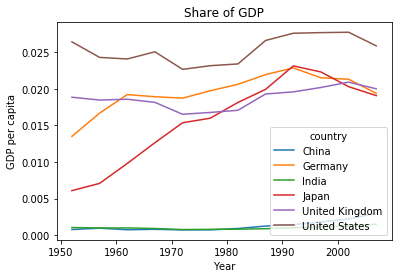

In [ ]:
sns.lineplot(data = ans5a, x = 'year', y = 'gdpPercap', hue = 'country')
plt.title('Share of GDP')
plt.xlabel('Year')
plt.ylabel("GDP per capita");